In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [34]:
from keras.datasets import cifar10
ci=cifar10.load_data()
dir(ci)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [20]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [21]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [22]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [23]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model=RandomForestClassifier()

In [26]:
model.fit(x_train2,y_train)

C:\Users\kunal\AppData\Local\Temp\ipykernel_21996\2819209888.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train2,y_train)


RandomForestClassifier()

In [27]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

In [28]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1034
           1       0.55      0.51      0.53      1083
           2       0.31      0.35      0.33       874
           3       0.30      0.35      0.32       861
           4       0.39      0.40      0.39       990
           5       0.38      0.41      0.40       923
           6       0.56      0.47      0.51      1190
           7       0.46      0.52      0.49       868
           8       0.62      0.59      0.60      1059
           9       0.53      0.48      0.50      1118

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [38]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[563,  30, 103,  56,  55,  28,  13,  49,  82,  55],
       [ 37, 553,  49,  45,  18,  33,  35,  42,  91, 180],
       [ 60,  17, 308,  63, 162,  92,  89,  48,  20,  15],
       [ 11,  42,  80, 299,  62, 184,  74,  52,  29,  28],
       [ 34,  19, 158,  75, 392,  63, 102, 108,  19,  20],
       [ 20,  26,  66, 174,  54, 380,  64,  91,  29,  19],
       [ 24,  44, 123, 141, 138,  70, 563,  45,  12,  30],
       [ 23,  27,  59,  55,  75,  90,  22, 455,  24,  38],
       [165,  65,  26,  24,  22,  30,   5,  19, 621,  82],
       [ 63, 177,  28,  68,  22,  30,  33,  91,  73, 533]], dtype=int64)

Text(69.0, 0.5, 'Truth')

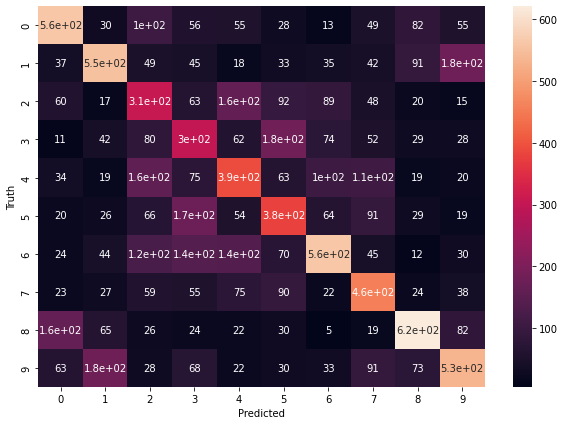

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')